In [1]:
#to start off this project I want to import all the libraries I will be using for Exploratory Data Analysis
import warnings
warnings.filterwarnings('ignore') #this will ignore warnings 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) #this makes the plot look nicer
%matplotlib inline

In [2]:
#now I want to import the datasource 
data=pd.read_csv('abtest.csv')

In [3]:
#lets look at the first 5 rows
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
data.info() #this is to get information on the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
data.shape

(100, 6)

There are 100 rows and 6 columns in this dataset.

In [6]:
data.isna().sum() #this is to see if there are any missing values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
#coverting "objects" to "category" reduces the data space required to store the dataframe
#we will also convert the user_id to a "category" since the number is representative of a unique profile
data["group"]=data["group"].astype("category")
data["landing_page"]=data["landing_page"].astype("category")
data["converted"]=data["converted"].astype("category")
data["language_preferred"]=data["language_preferred"].astype("category")
data["user_id"]=data["user_id"].astype("category")
data["time_spent_on_the_page"]=data["time_spent_on_the_page"].astype("int64")

In [8]:
data.info() #lets see the new info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    int64   
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), int64(1)
memory usage: 6.7 KB


Group, landing_page, converted, language_preferred, and user_id were converted to categories. Time_spent_on_the_page was also converted to an int64. You can see the memory usage is lower at 6.7 KB.

In [9]:
data.describe()

,time_spent_on_the_page
count,100.000000
mean,4.940000
std,2.432192
min,0.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


The mean and median are very close in time. 

In [10]:
data.describe(include=["category"]) #we will describe the data to also include the category data type

,user_id,group,landing_page,converted,language_preferred
count,100,100,100,100,100
unique,100,2,2,2,3
top,546443,control,new,yes,French
freq,1,50,50,54,34


The first group, control, contains 50 people. Therefore the second group, treatment, occurs 50 times.
There are more who are converted to a subscriber of the news portal than not. There are 54 who convert.
There are 3 different languages the user chooses to view the landing page. The top language used is French at 34 people.

In [11]:
data.var() #data dispersion

time_spent_on_the_page    5.915556
dtype: float64

Now, let's move onto the univariate analysis.

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

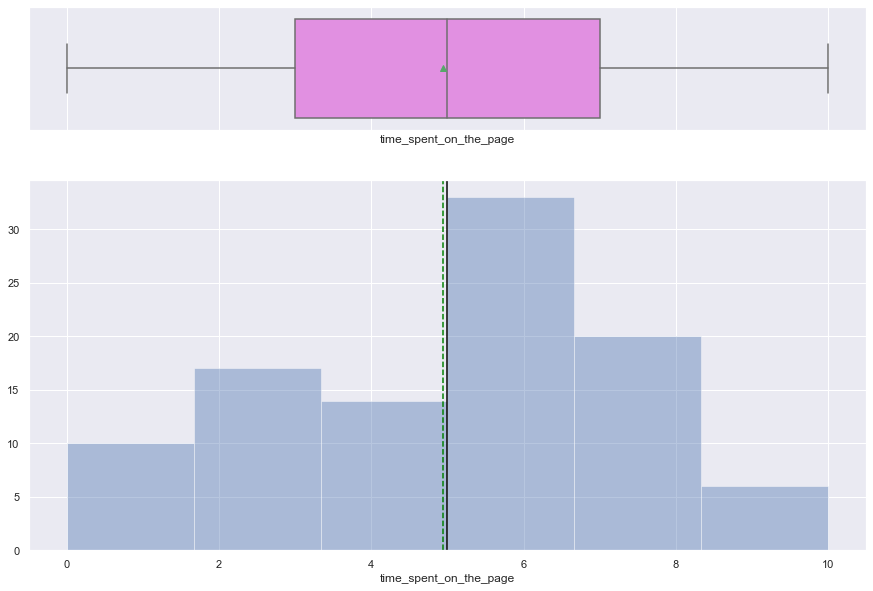

In [13]:
histogram_boxplot(data["time_spent_on_the_page"])

Here, you can see that the mean and median are very close together. The median is slightly higher. This graph is slightly skewed to the left as well, meaning there are higher number of people spending more than 5 minutes on the landing page. 

In [14]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

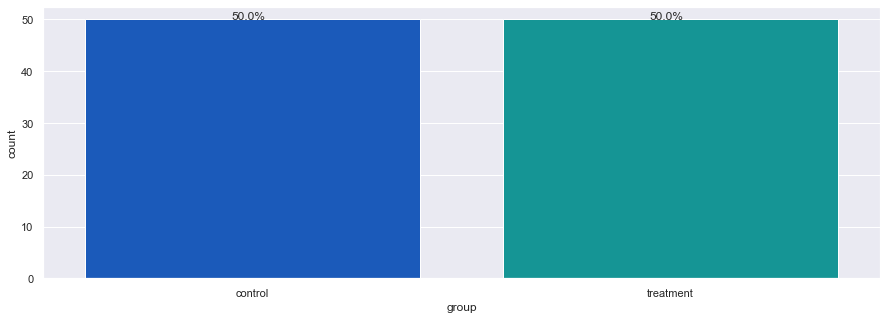

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["group"],palette='winter')
perc_on_bar(ax,data["group"])

Here you can visually see that the two groups (control and treatment) were split evenly. 

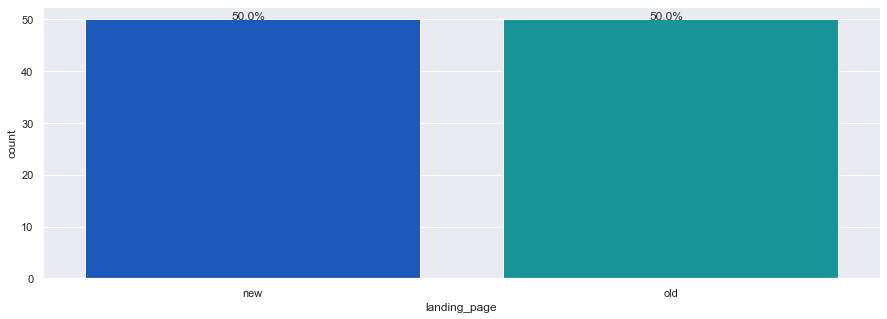

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["landing_page"],palette='winter')
perc_on_bar(ax,data["landing_page"])

Here you can visually see that half of the group went to the new site and the other half went to the old site.

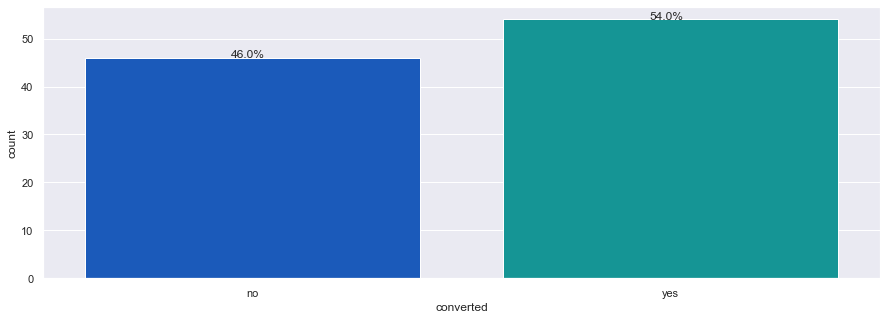

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["converted"],palette='winter')
perc_on_bar(ax,data["converted"])

Here, you can see that 46% of the users did NOT convert to a subscriber of the news portal, but 54% of users DID convert to a subscriber of the news portal.

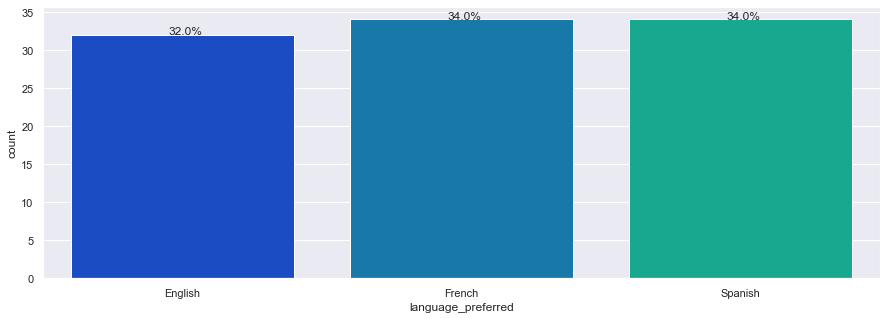

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["language_preferred"],palette='winter')
perc_on_bar(ax,data["language_preferred"])

Now, we can see the 3 types of language that users chose to view the landing page. Here, it appears that French and Spanish are tied at 34%, while English is last at 32%.

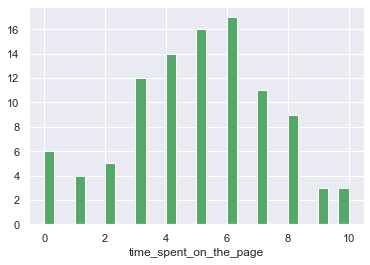

In [19]:
plt.hist(data['time_spent_on_the_page'], bins=30, color='g') #this is another histogram that will demonstrate time spent on the page amongst different bins. This works well visually to see the various times.
plt.xlabel("time_spent_on_the_page")
plt.show()

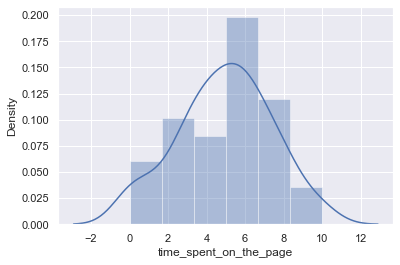

In [20]:
sns.distplot(data['time_spent_on_the_page']); #we can also use this type of histogram to view the data

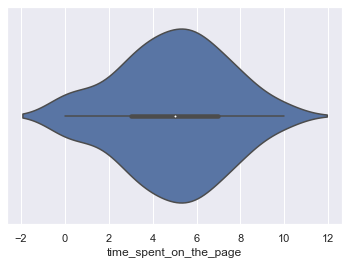

In [21]:
sns.violinplot(data["time_spent_on_the_page"] ); #we will use the violin plot to also look at time spent on the page

In [22]:
#a list of all categorical variables. I want to see the unique values in each category besides unique_id because I know they are all different from one another.
cat_objects=['group','landing_page', 'converted', 'language_preferred']

for column in cat_objects:
    print(data[column].value_counts())
    print('-'*50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


Now I can see that French and Spanish are exactly equal.

Bivariate Analysis

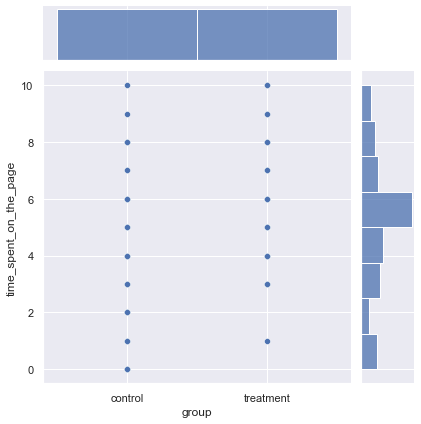

In [23]:
#lets use the jointplot function on our strongly correlated variables 
sns.jointplot(data['group'], data['time_spent_on_the_page']);

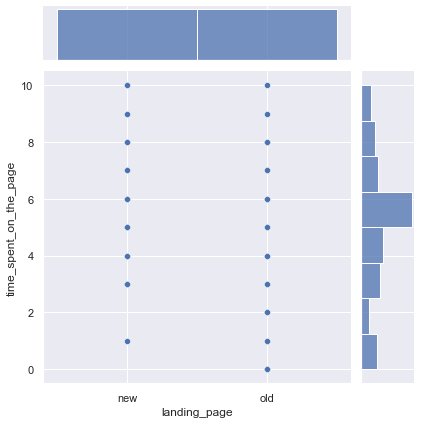

In [24]:
#lets use the jointplot function on our strongly correlated variables 
sns.jointplot(data['landing_page'], data['time_spent_on_the_page']);

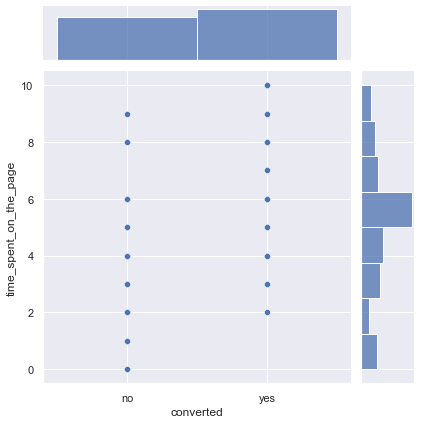

In [25]:
#lets use the jointplot function on our strongly correlated variables 
sns.jointplot(data['converted'], data['time_spent_on_the_page']);

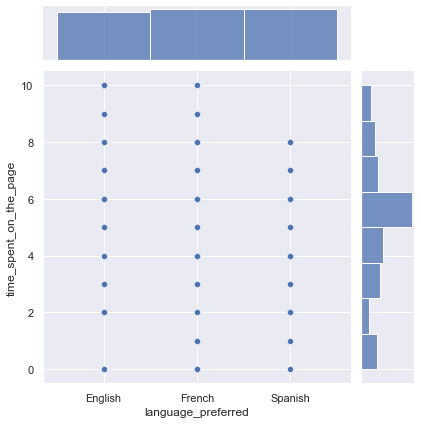

In [26]:
#lets use the jointplot function on our strongly correlated variables 
sns.jointplot(data['language_preferred'], data['time_spent_on_the_page']);

It appears although there were more French and Spanish users, those who viewed the landing page in English and French spent more minutes on the page than Spanish.

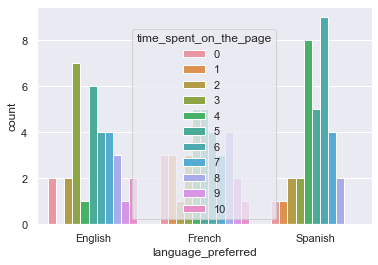

In [27]:
#there are other types of graphs we can use to compare and look at data such as the countplot
sns.countplot(data['language_preferred'], hue = data['time_spent_on_the_page'])
plt.show()

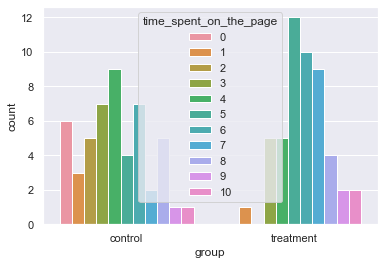

In [28]:
#there are other types of graphs we can use to compare and look at data such as the countplot
sns.countplot(data['group'], hue = data['time_spent_on_the_page'])
plt.show()

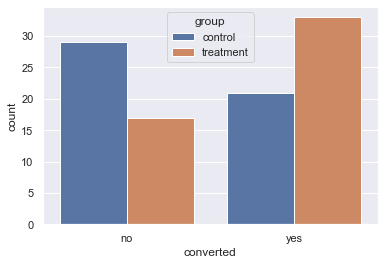

In [29]:
#there are other types of graphs we can use to compare and look at data such as the countplot
sns.countplot(data['converted'], hue = data['group'])
plt.show()

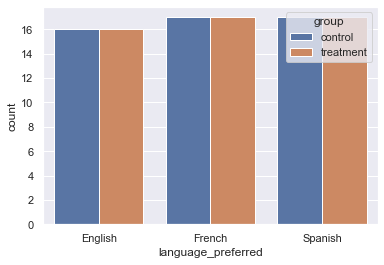

In [30]:
#there are other types of graphs we can use to compare and look at data such as the countplot
sns.countplot(data['language_preferred'], hue = data['group'])
plt.show()

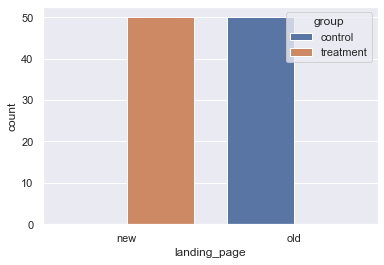

In [82]:
sns.countplot(data['landing_page'], hue = data['group'])
plt.show()

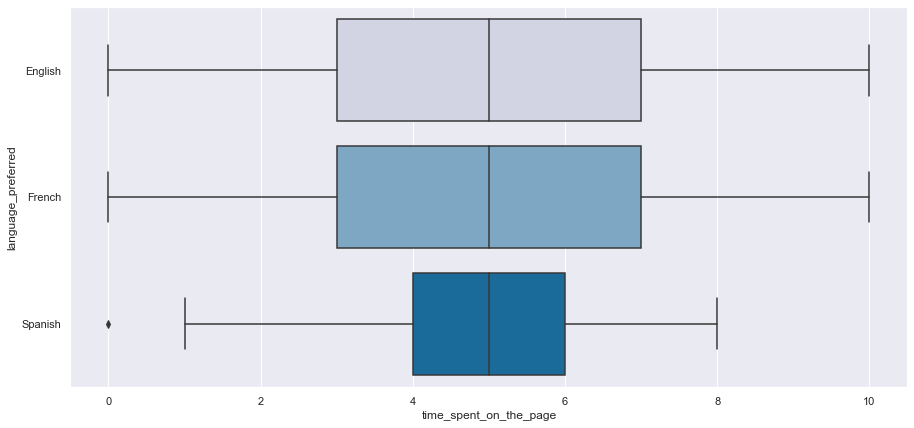

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(data["time_spent_on_the_page"],data["language_preferred"],palette="PuBu")
plt.show()

In the graph above, we can see that each language's median is very similar. However, there is more time and variety spent on the page for those who speak English and French, about 3 - 7 minutes. Those who speak spanish, mostly stayed on the page between 4 and 6 minutes. 

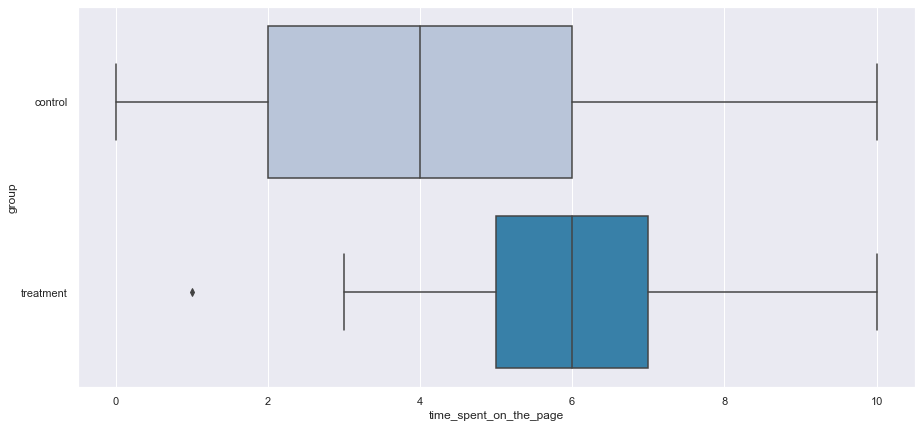

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(data["time_spent_on_the_page"],data["group"],palette="PuBu")
plt.show()

Here, we see that the control group had a larger window of time spent on the page, but spent less time on the page which is between 2 and 6 minutes. Those who are in the treatment group, had a smaller window of time spent on the page, but also tended to stay on the page longer at 5 - 7 minutes. 

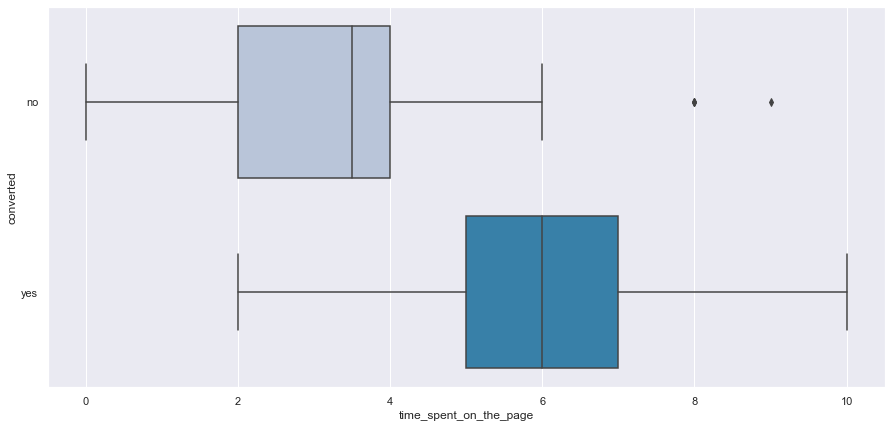

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data["time_spent_on_the_page"],data["converted"],palette="PuBu")
plt.show()

In the above graph, you can see that those who spent less time on the page, did not convert as a subscriber. Those who spent more time on the page, converted as a subscriber.

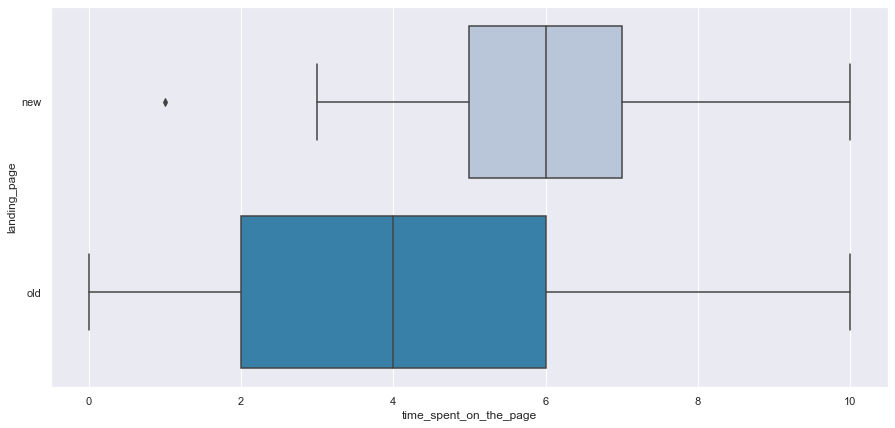

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data["time_spent_on_the_page"],data["landing_page"],palette="PuBu")
plt.show()

In the above graph, you can see that those who went to the new page, had a smaller group that spent more time on the landing page. Those who went to the old page, had a larger group that spent less time on the page collectively.

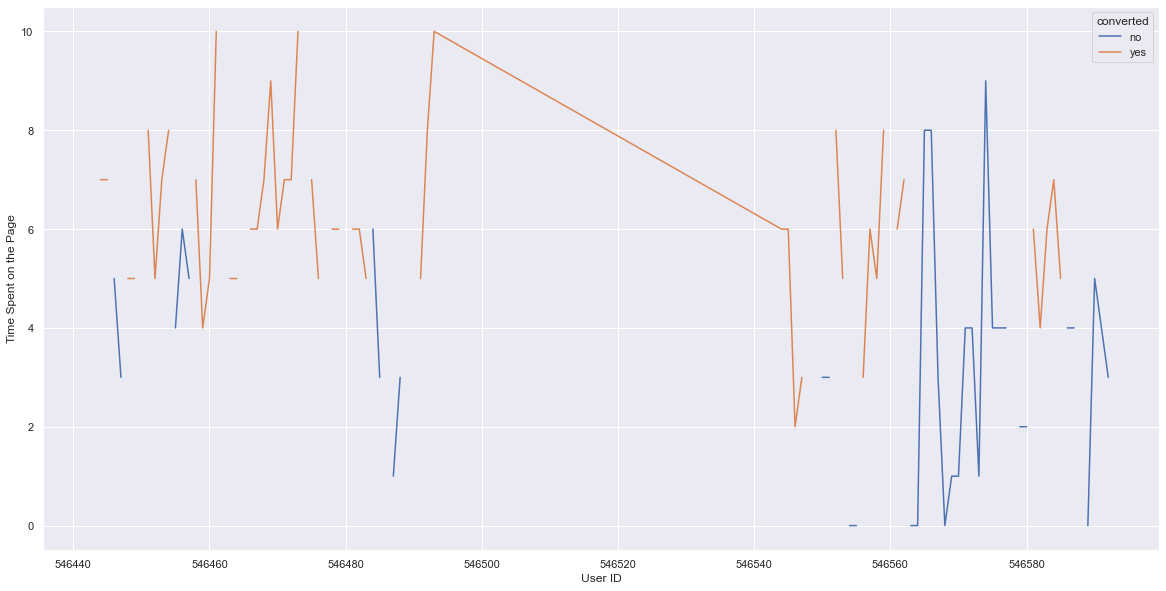

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(x="user_id", y="time_spent_on_the_page", ci=95, data=data, hue='converted')
plt.ylabel('Time Spent on the Page')
plt.xlabel('User ID')
plt.show()

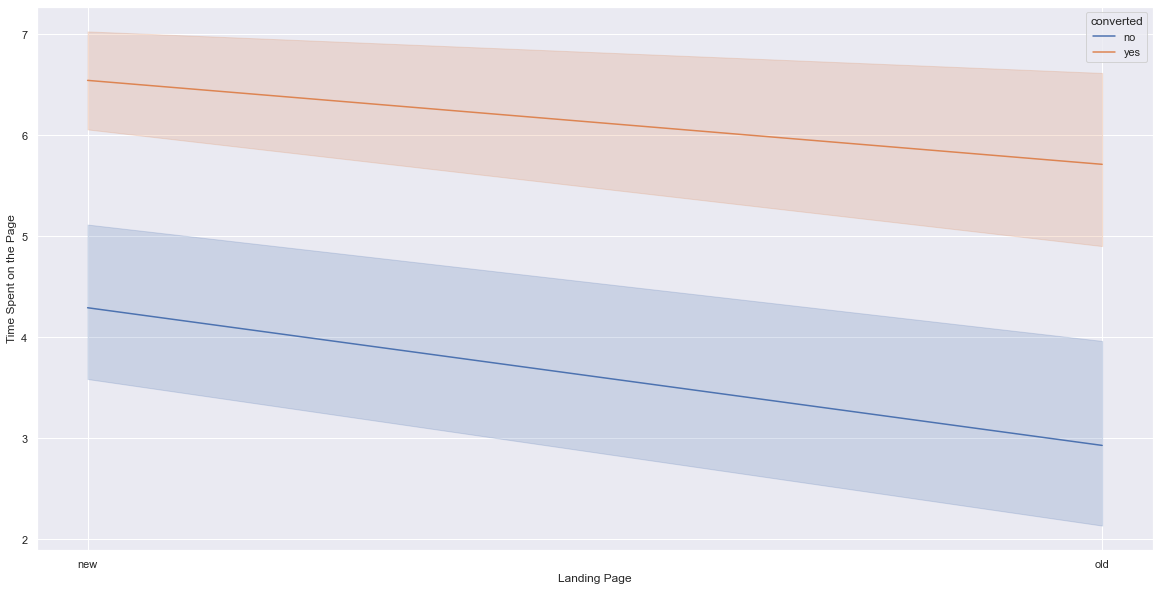

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(x="landing_page", y="time_spent_on_the_page", ci=95, data=data, hue='converted')
plt.ylabel('Time Spent on the Page')
plt.xlabel('Landing Page')
plt.show()

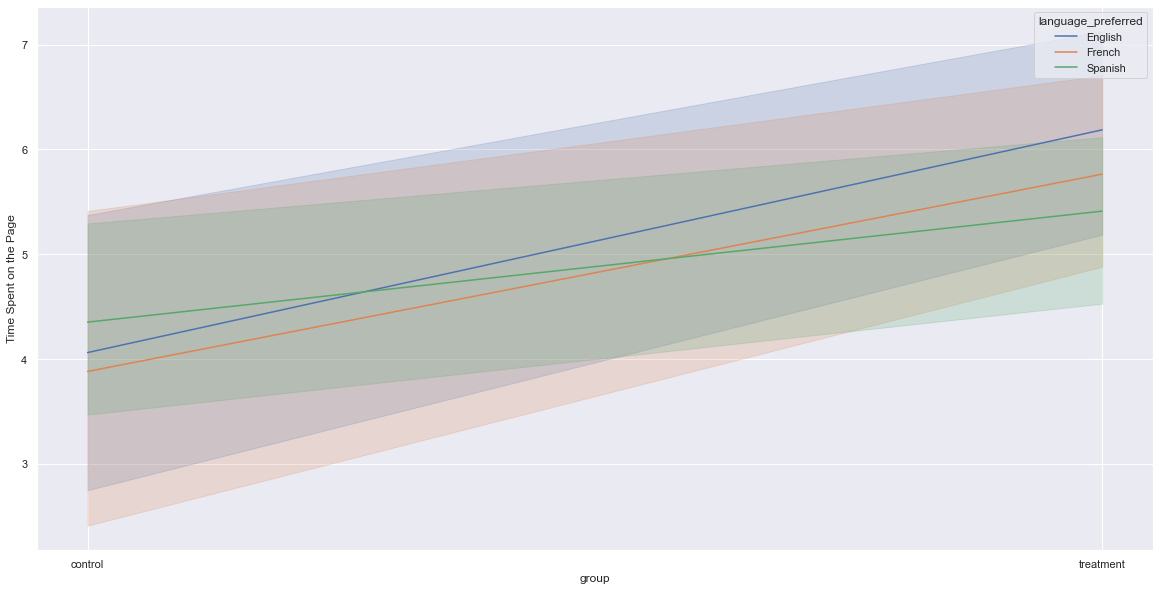

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x="group", y="time_spent_on_the_page", ci=95, data=data, hue='language_preferred')
plt.ylabel('Time Spent on the Page')
plt.xlabel('group')
plt.show()

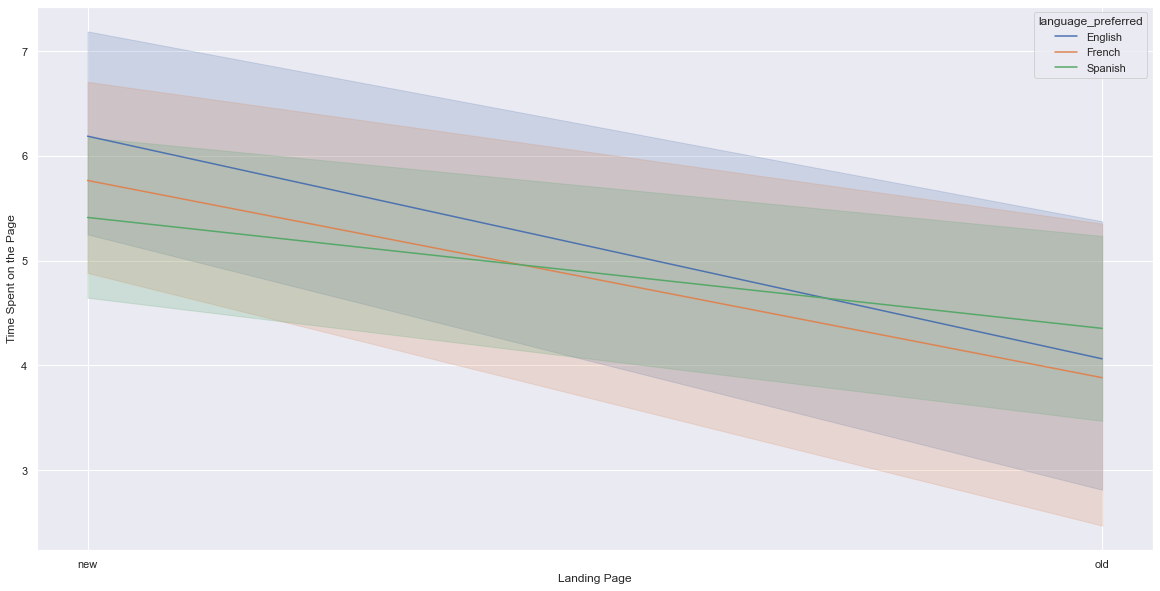

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x="landing_page", y="time_spent_on_the_page", ci=95, data=data, hue='language_preferred')
plt.ylabel('Time Spent on the Page')
plt.xlabel('Landing Page')
plt.show()

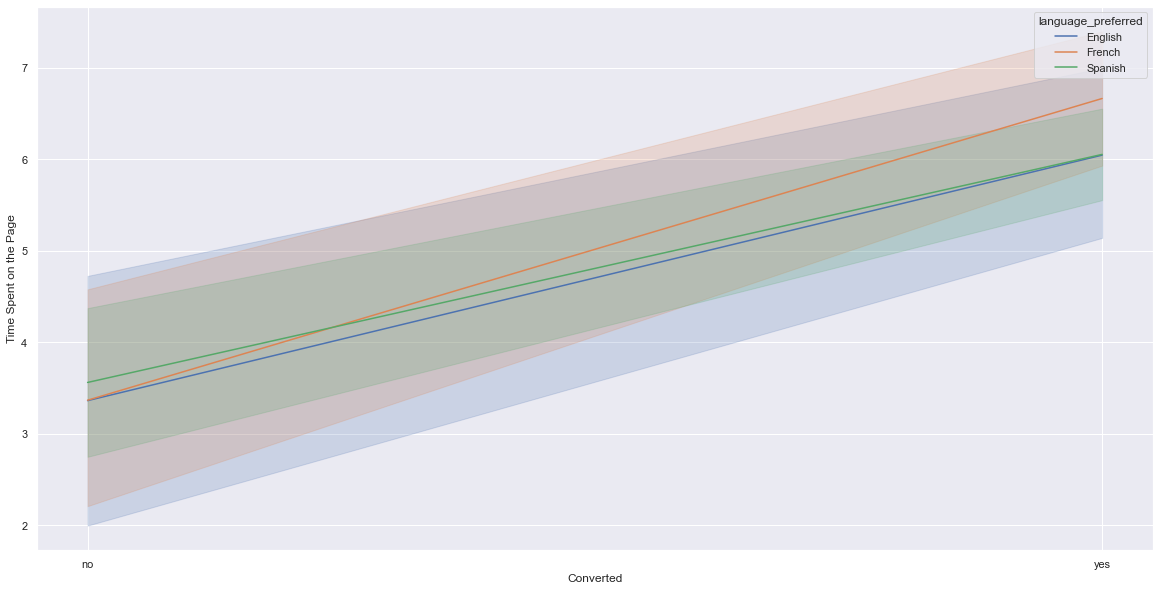

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x="converted", y="time_spent_on_the_page", ci=95, data=data, hue='language_preferred')
plt.ylabel('Time Spent on the Page')
plt.xlabel('Converted')
plt.show()

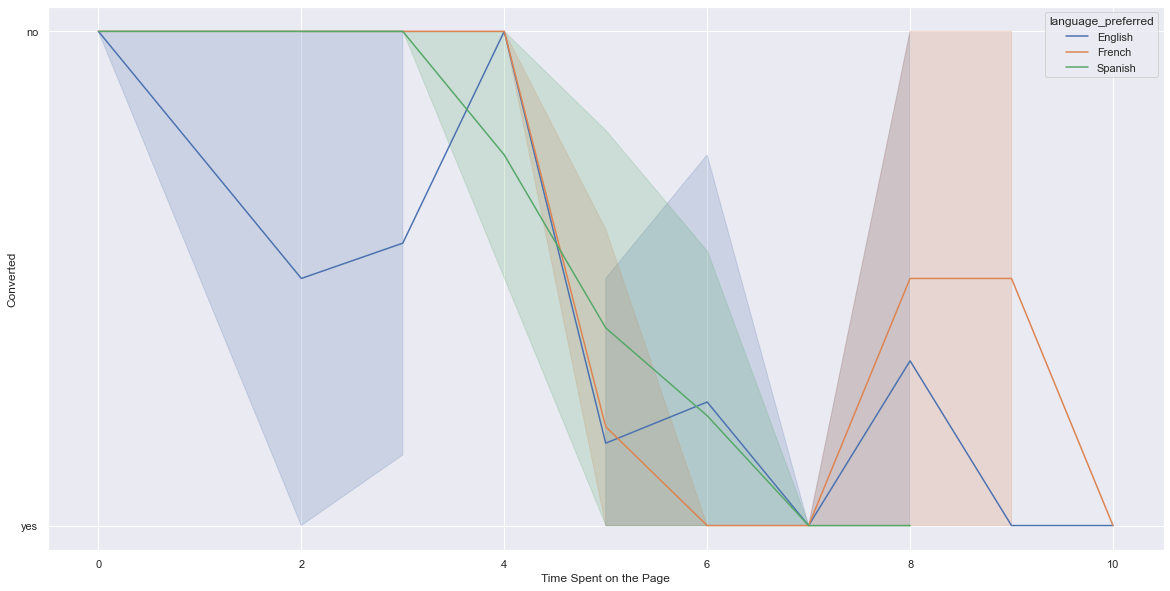

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(x="time_spent_on_the_page", y="converted", ci=95, data=data, hue='language_preferred')
plt.ylabel('Converted')
plt.xlabel('Time Spent on the Page')
plt.show()

From these graphs, I can draw the following conclusions:
1. users who spent more time on the landing page became a subscriber
2. users who spent less time on the landing page did not become a subscriber
3. users who spent time on the new landing page were spending more time on the page and likely to become a subscriber
4. users who spent time on the old landing page were spending less time on the page and not becoming a subscriber
5. English, French & Spanish speaking people who spent less time on the landing page were less likely to become a subscriber
6. English, French, & Spanish speaking people who spent more time on the landing page were more likely to become a subscriber

**Now, lets move onto the the statistical and visual analysis.**

In [41]:
from scipy import stats
# import the required function
from statsmodels.stats.proportion import proportions_ztest

Part of the problem that we want to figure out is if users spend more time on the new landing page than the old landing page. We know that the significance level is at 0.05. 

The null hypothesis is that users spend more time on the old page.

The alternative hypothesis is that users spend more time on the new page.

In [42]:
data_new=data[data['landing_page']=='new']
data_old=data[data['landing_page']=='old']

In [43]:
a=data_new['time_spent_on_the_page']

In [44]:
b=data_old['time_spent_on_the_page']

In [45]:
data_new.head(25)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7,yes,English
2,546462,treatment,new,4,no,Spanish
4,546459,treatment,new,4,yes,Spanish
6,546448,treatment,new,5,yes,French
8,546461,treatment,new,10,yes,French
12,546491,treatment,new,5,yes,Spanish
13,546478,treatment,new,6,yes,French
15,546466,treatment,new,6,yes,Spanish
16,546443,treatment,new,8,no,English
22,546450,treatment,new,3,no,English


In [46]:
data_old.head(25)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3,no,Spanish
3,546567,control,old,3,no,French
5,546558,control,old,5,yes,English
7,546581,control,old,6,yes,Spanish
9,546548,control,old,2,no,English
10,546588,control,old,6,yes,Spanish
11,546546,control,old,2,yes,English
14,546578,control,old,8,yes,Spanish
17,546555,control,old,0,no,English
18,546493,control,old,10,yes,English


In [47]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 50 non-null     category
 1   group                   50 non-null     category
 2   landing_page            50 non-null     category
 3   time_spent_on_the_page  50 non-null     int64   
 4   converted               50 non-null     category
 5   language_preferred      50 non-null     category
dtypes: category(5), int64(1)
memory usage: 6.4 KB


In [48]:
data_new.describe()

,time_spent_on_the_page
count,50.000000
mean,5.780000
std,1.887553
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


Here we see that the standard deviation for time spent on the new page is 1.88. 

In [49]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 96
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 50 non-null     category
 1   group                   50 non-null     category
 2   landing_page            50 non-null     category
 3   time_spent_on_the_page  50 non-null     int64   
 4   converted               50 non-null     category
 5   language_preferred      50 non-null     category
dtypes: category(5), int64(1)
memory usage: 6.4 KB


In [50]:
data_old.describe()

,time_spent_on_the_page
count,50.000000
mean,4.100000
std,2.636092
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,10.000000


Here we see that the standard deviation for the time spent on the old page is 2.64.

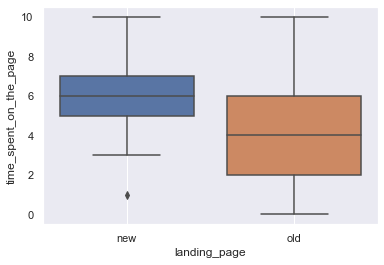

In [51]:
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = data)
plt.grid()
plt.show()

In [52]:
from scipy.stats import ttest_1samp

In [53]:
print(str(round(data_new.mean(), 1)))
print(str(round(data_old.mean(), 1)))

time_spent_on_the_page    5.8
dtype: float64
time_spent_on_the_page    4.1
dtype: float64


The mean time spent on the new page is 5.8. 
The mean time spent on the old page is 4.1.

In [54]:
#I am going to use the two sample Z-test for this problem
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    return pval # return the p-value

In [55]:
# find the p-value using the ztest_2samp() function
p_value = ztest_2samp(data_new.dropna(), data_old, 1.88, 2.64, 50 ,50)
print('The P-value is', p_value)

The P-value is [0.00012349]


As the p-value is less than 0.05, we can reject the null hypothesis. Users spend more time on the new landing page. 

The next question we are exploring, is that is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page. 

The null hypothesis is the old page has a greater or equal conversion rate than the new page.

The alternte hypothesis is that the conversion rate for the new page is greater than the conversion rate for the old page.

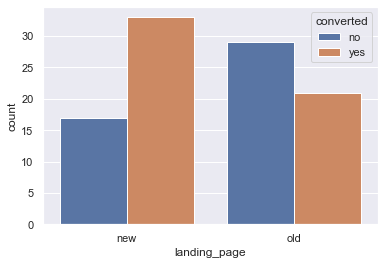

In [81]:
#lets see this visually 

sns.countplot(data['landing_page'], hue = data['converted'])
plt.show()

In [56]:
#first lets see how many converted vs did not convert
cat_objects=['converted']

for column in cat_objects:
    print(data[column].value_counts())
    print('-'*50)

yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------


In [57]:
#lets find the converstion rate for those who did convert as a subscriber
x=54/100
x

0.54

In [58]:
#lets find the conversion rate for those who did not convert as a subscriber
a = 46/100
a

0.46

In [59]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(54, 100, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.21111097643736182


As the p-value is less than 0.05, we can reject the null hypothesis that the old page has a greater or equal conversion rate than the new page. The researcher has enough statistical evidence that to say that the new landing page converts more subscribers at 5% significance level. 

Lets move onto another problem that we are trying to solve. The problem is does the converted status depend on the preferred language? 

The Null hypothesis: The converted status does not depend on the preferred language. 

The alternative hypothesis: The converted status does depend on the preferred language. 

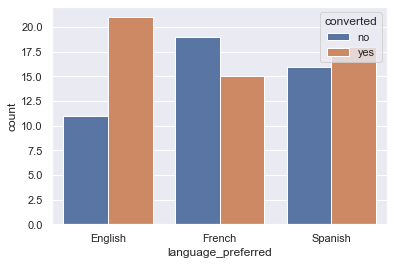

In [79]:
#lets visually see the data of those who have been converted vs not against their language
sns.countplot(data['language_preferred'], hue = data['converted'])
plt.show()

In [60]:
#now, lets create a contingency table to start
x2=pd.crosstab(index=data['converted'], columns=data['language_preferred'])
x2

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


Here, we see that 21 English speaking people converted, and 11 did not. 
15 French speaking people converted, and 19 did not. 
18 Spanish speaking people converted, and 16 did not.

In [61]:
from   scipy.stats import chi2_contingency   # For Chi-Square test

In [62]:
# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(x2)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


As the p-value is higher than the significance level, we cannot reject the null hypothesis. Hence, the converted status does not depend on the preferred language.

The next question we would like to test is whether mean time spent on the new page is the same for the different language users.

The null hypothesis is that the the mean time spent on the new page are the same for different language users.
The alternative hypothesis is that the mean time spent on the new page is not the same for the different language users.

In [63]:
data_new=data[data['landing_page']=='new']

In [76]:
data_new.head(5) #this is to confirm we have the users on the new page pulled

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7,yes,English
2,546462,treatment,new,4,no,Spanish
4,546459,treatment,new,4,yes,Spanish
6,546448,treatment,new,5,yes,French
8,546461,treatment,new,10,yes,French


In [67]:
# get the levels of factor fuel_type
data['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

language_preferred
English    5.125000
French     4.823529
Spanish    4.882353
Name: time_spent_on_the_page, dtype: float64


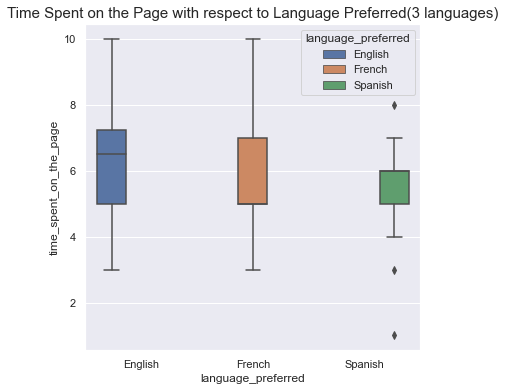

In [68]:
#lets test the new users on the landing page with their language preferred 
# mean of language_preferred at different times spent on the page
print(data.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = data_new, hue = 'language_preferred')
a.set_title("Time Spent on the Page with respect to Language Preferred(3 languages)", fontsize=15)
plt.show()

The next step is to test the normality and equality of variance assumptions. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

Shapiro-Wilk’s test
We will test the null hypothesis

𝐻0:  Time spent on the page follows a normal distribution 

against the alternative hypothesis

𝐻𝑎:  Time spent on the page does not follow a normal distribution

In [70]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(data_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.206612691283226


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution

Levene’s test
We will test the null hypothesis

𝐻0 : All the population variances are equal

against the alternative hypothesis

𝐻𝑎 : At least one variance is different from the rest

In [71]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( data_new['time_spent_on_the_page'][data_new['language_preferred']=="English"], 
                                   data_new['time_spent_on_the_page'][data_new['language_preferred']=="French"], 
                                   data_new['time_spent_on_the_page'][data_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.5368344380310286


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

The assumptions are satisfied- the populations are normally distributed, samples are independent simple random samples, and the population variances are equal.

In [72]:
#now lets find the p-value
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new.loc[data_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.5075485557045248


As the p-value is very large, we fail to reject the null hypothesis that the mean time spent on the new page is different for each language. The mean time spent on the new page for different languages is generally the same. However, we can use the Multiple comparison tests to test the differences between all pairs of means. This can confirm our finding.

the null hypothesis is

𝐻0:𝜇1=𝜇2 and 𝜇1=𝜇3 and 𝜇2=𝜇3 

against the alternative hypothesis

𝐻𝑎:𝜇1≠𝜇2 or 𝜇1≠𝜇3 or 𝜇2≠𝜇3

In [75]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = data_new['time_spent_on_the_page'], groups = data_new['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4228 0.7812 -2.0241 1.1785  False
English Spanish  -0.7757 0.4771 -2.3771 0.8256  False
 French Spanish  -0.3529 0.8365 -1.9298  1.224  False
-----------------------------------------------------


As every p-value under the p-adj column are larger than the significance level, we can confirm that we fail to reject the null hypothesis. The mean time for users on their preferred language on the new landing page are generally the same. 

**Key Insights and Takeaways**


Based off of my Exploratory Data Analysis I found the following to be true:


    - Users who spent time on the new landing page were more likely to become a subscriber. Users who spent their time on the old landing page were less likely to become a subscriber. New users were spending more time on the landing page and old users were spending less time on the landing page. Users who were on the new landing page were more likely to be converted as a subscriber. Therefore, it appears that English, French and Spanish users who were on the new landing page converted as a subscriber. Based on my exploratory data analysis, I would suggest to keep using the new landing page as they are converting as a subscriber more often than those who are on the old landing page. 
    
  
Let's further confirm my conclusions based on statistical analysis. 

Based off of my Statistical analysis I found the following to be true:

    -Users spend more time on the new landing page
    -the converted status does not rely on preferred language
    -the new landing page converts more users than the old landing page
    -the mean time for users who speak French, English, and Spanish on the new landing page are generally the same
    
Based off these findings, I can conclude that my Exploratory Data Analysis findings were correct. I also went even further to discover findings based on preferred language. As the converted status does not rely on preferred language and that the mean time spent for users who speak different languages is generally the same, we can conclude that the new landing page is working well. We should discontinue the old landing page and continue to use the new landing page. 
    